In [3]:
import pyspark

In [4]:
# Import Pyspark and SparkSession library
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('classifier').getOrCreate()

In [6]:
# Load training data
df = spark.read.csv('College.csv',inferSchema=True,header=True)

In [7]:
df.head(2)

[Row(School='Abilene Christian University', Private='Yes', Apps=1660, Accept=1232, Enroll=721, Top10perc=23, Top25perc=52, F_Undergrad=2885, P_Undergrad=537, Outstate=7440, Room_Board=3300, Books=450, Personal=2200, PhD=70, Terminal=78, S_F_Ratio=18.1, perc_alumni=12, Expend=7041, Grad_Rate=60),
 Row(School='Adelphi University', Private='Yes', Apps=2186, Accept=1924, Enroll=512, Top10perc=16, Top25perc=29, F_Undergrad=2683, P_Undergrad=1227, Outstate=12280, Room_Board=6450, Books=750, Personal=1500, PhD=29, Terminal=30, S_F_Ratio=12.2, perc_alumni=16, Expend=10527, Grad_Rate=56)]

In [8]:
df.printSchema()

root
 |-- School: string (nullable = true)
 |-- Private: string (nullable = true)
 |-- Apps: integer (nullable = true)
 |-- Accept: integer (nullable = true)
 |-- Enroll: integer (nullable = true)
 |-- Top10perc: integer (nullable = true)
 |-- Top25perc: integer (nullable = true)
 |-- F_Undergrad: integer (nullable = true)
 |-- P_Undergrad: integer (nullable = true)
 |-- Outstate: integer (nullable = true)
 |-- Room_Board: integer (nullable = true)
 |-- Books: integer (nullable = true)
 |-- Personal: integer (nullable = true)
 |-- PhD: integer (nullable = true)
 |-- Terminal: integer (nullable = true)
 |-- S_F_Ratio: double (nullable = true)
 |-- perc_alumni: integer (nullable = true)
 |-- Expend: integer (nullable = true)
 |-- Grad_Rate: integer (nullable = true)



In [9]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


In [10]:
df.columns

['School',
 'Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F_Undergrad',
 'P_Undergrad',
 'Outstate',
 'Room_Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S_F_Ratio',
 'perc_alumni',
 'Expend',
 'Grad_Rate']

In [11]:
# After dropping columns that won't help predict the target variable
assembler = VectorAssembler(
  inputCols=['Apps',
             'Accept',
             'Enroll',
             'Top10perc',
             'Top25perc',
             'F_Undergrad',
             'P_Undergrad',
             'Outstate',
             'Room_Board',
             'Books',
             'Personal',
             'PhD',
             'Terminal',
             'S_F_Ratio',
             'perc_alumni',
             'Expend',
             'Grad_Rate'],
              outputCol="features")

In [12]:
df.printSchema()

root
 |-- School: string (nullable = true)
 |-- Private: string (nullable = true)
 |-- Apps: integer (nullable = true)
 |-- Accept: integer (nullable = true)
 |-- Enroll: integer (nullable = true)
 |-- Top10perc: integer (nullable = true)
 |-- Top25perc: integer (nullable = true)
 |-- F_Undergrad: integer (nullable = true)
 |-- P_Undergrad: integer (nullable = true)
 |-- Outstate: integer (nullable = true)
 |-- Room_Board: integer (nullable = true)
 |-- Books: integer (nullable = true)
 |-- Personal: integer (nullable = true)
 |-- PhD: integer (nullable = true)
 |-- Terminal: integer (nullable = true)
 |-- S_F_Ratio: double (nullable = true)
 |-- perc_alumni: integer (nullable = true)
 |-- Expend: integer (nullable = true)
 |-- Grad_Rate: integer (nullable = true)



In [13]:
import pandas as pd
import numpy as np

In [14]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
School,Abilene Christian University,Adelphi University,Adrian College,Agnes Scott College,Alaska Pacific University
Private,Yes,Yes,Yes,Yes,Yes
Apps,1660,2186,1428,417,193
Accept,1232,1924,1097,349,146
Enroll,721,512,336,137,55
Top10perc,23,16,22,60,16
Top25perc,52,29,50,89,44
F_Undergrad,2885,2683,1036,510,249
P_Undergrad,537,1227,99,63,869
Outstate,7440,12280,11250,12960,7560


In [15]:
# Summary Statistics
num_features=[t[0] for t in df.dtypes if t[1]=='int']
df.select(num_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Apps,777,3001.6383526383524,3870.2014844352884,81,48094
Accept,777,2018.8043758043757,2451.11397099263,72,26330
Enroll,777,779.972972972973,929.17619013287,35,6392
Top10perc,777,27.55855855855856,17.640364385452134,1,96
Top25perc,777,55.7966537966538,19.804777595131373,9,100
F_Undergrad,777,3699.907335907336,4850.420530887386,139,31643
P_Undergrad,777,855.2985842985843,1522.431887295513,1,21836
Outstate,777,10440.66924066924,4023.0164841119727,2340,21700
Room_Board,777,4357.526383526383,1096.6964155935289,1780,8124


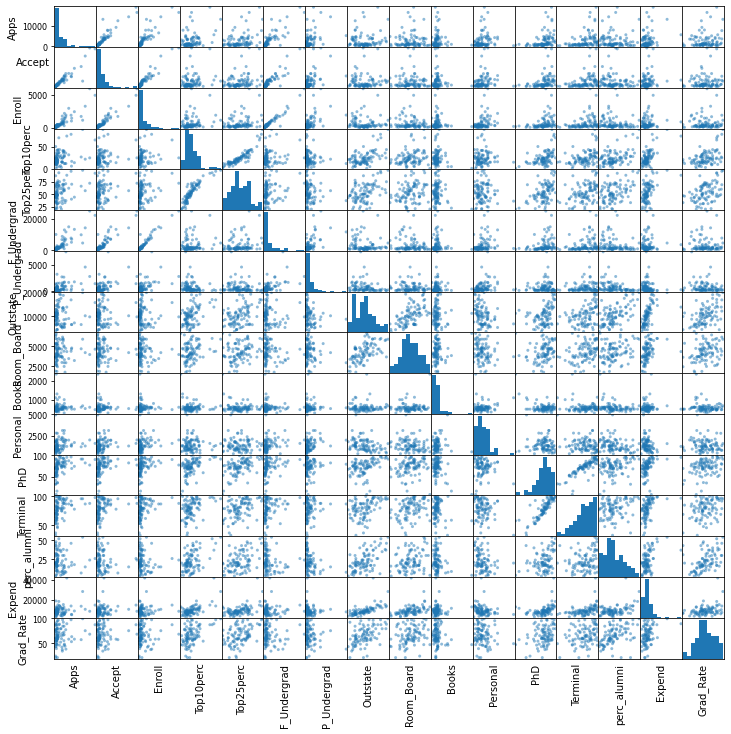

In [16]:
# Plotting the data to visualize correlations
from pandas.plotting._misc import scatter_matrix
import matplotlib as plt
%matplotlib inline
num_data=df.select(num_features).sample(False,0.10).toPandas()

axs=scatter_matrix(num_data, figsize=(12,12));

n=len(num_data.columns)
for i in range(n):
    v=axs[1,0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h=axs[n-1,i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# Data Preprocessing and Feature Creation


In [20]:
# Transforming the data
output = assembler.transform(df)

In [21]:
# importing StringIndexer 
from pyspark.ml.feature import StringIndexer

In [22]:
# Fitting the data 
indexer = StringIndexer(inputCol="Private", outputCol="Private_Index")
output_fixed = indexer.fit(output).transform(output)

In [23]:
final_data = output_fixed.select("features",'Private_Index')

In [61]:
labelCol='Private_Index'
featuresCol='features'

In [62]:
# Setting test and train data with a 80/20 split
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [63]:
# Importing libraries for LR and Ensemble models
from pyspark.ml.classification import (DecisionTreeClassifier,GBTClassifier,
                                       RandomForestClassifier, LogisticRegression)
from pyspark.ml import Pipeline

In [64]:
# Using a logistic function to model the binary variable
lr=LogisticRegression(labelCol='Private_Index', featuresCol='features', maxIter=10)

In [65]:
# Fitting the LR training data
lr_model = lr.fit(train_data)

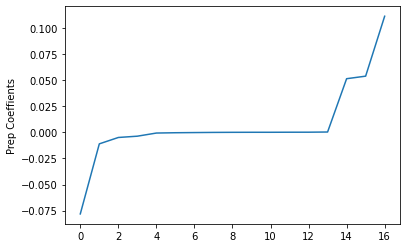

In [66]:
# Plotting the model coefficients
import matplotlib.pyplot as plt
prep=np.sort(lr_model.coefficients)

plt.plot(prep)
plt.ylabel('Prep Coeffients')
plt.show()

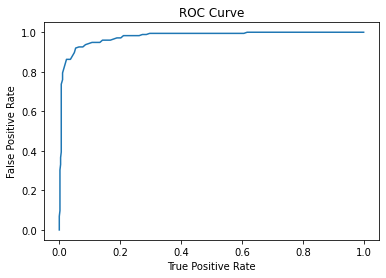

Training set areaUnderROC: 0.9774807987711217


In [67]:
# Plotting the training set area Under the Curve (ROC)

trainingSummary = lr_model.summary

roc=trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: '+
     str(trainingSummary.areaUnderROC))


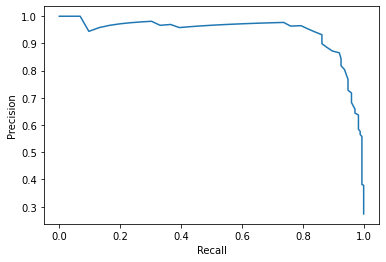

In [68]:
# Plotting the precision and Recall

pr=trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [69]:
# Prediction outputs showing only 15 rows
predictions = lr_model.transform(test_data)

In [70]:
predictions.select('Private_Index','rawPrediction','prediction','probability').show(15)

+-------------+--------------------+----------+--------------------+
|Private_Index|       rawPrediction|prediction|         probability|
+-------------+--------------------+----------+--------------------+
|          0.0|[8.21726543745978...|       0.0|[0.99973012059672...|
|          0.0|[6.59234469041448...|       0.0|[0.99863105454132...|
|          0.0|[1.65934260816700...|       0.0|[0.84014973628545...|
|          0.0|[0.55031668863789...|       0.0|[0.63420906207370...|
|          0.0|[6.17271686031145...|       0.0|[0.99791877840142...|
|          0.0|[5.85677871988720...|       0.0|[0.99714771565089...|
|          0.0|[5.57415582880317...|       0.0|[0.99621966755484...|
|          1.0|[2.87292639938659...|       0.0|[0.94649174963127...|
|          0.0|[2.52311399049808...|       0.0|[0.92574639455625...|
|          0.0|[5.32703349989857...|       0.0|[0.99516502923652...|
|          0.0|[8.18415154698882...|       0.0|[0.99972103676224...|
|          0.0|[5.09426703003426..

In [71]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [72]:
# Evaluating the accuracy of the test data. 
# Results of the testing set is pretty close to the training set
# as shown below in the Area Under ROC 
evaluator=BinaryClassificationEvaluator(labelCol="Private_Index")
lr_acc=evaluator.evaluate(predictions)
print('Test Area Under ROC ',lr_acc) 

Test Area Under ROC  0.9894594594594595


# Ensemble Classification Models


In [73]:
# Using an ensemble model of three classifiers to compare to LR results

dtc = DecisionTreeClassifier(labelCol='Private_Index',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Private_Index',featuresCol='features')
gbt = GBTClassifier(labelCol='Private_Index',featuresCol='features')

In [74]:
# Training the models
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [75]:
# Model prediction comparison
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [76]:
# Computing test errors
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_evaluator = MulticlassClassificationEvaluator(labelCol="Private_Index", predictionCol="prediction", metricName="accuracy")

In [77]:
# Evaluating models
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [78]:
print('-'*80)
print('A single decision tree had an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*80)
print('A Random Forest ensemble had an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*80)
print('An ensemble using GBT had an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

--------------------------------------------------------------------------------
A single decision tree had an accuracy of: 92.70%
--------------------------------------------------------------------------------
A Random Forest ensemble had an accuracy of: 95.62%
--------------------------------------------------------------------------------
An ensemble using GBT had an accuracy of: 92.70%


# Summary
Based on the results from comparing LR with the ensemble model (DTC, RFC and GBT) Classifiers, LR does seem to be slightly better than the three. Within the ensemble RFC performs slightly better.